# Assignment 3, Ennakoivat menetelmät – AVTEK 2025
Sairasvakuutusmaksut – k-means clustering


**Participants names and contributions**
- Name 1 – datan lataus ja esikäsittely
- Name 2 – k-means -kokeet ja elbow-menetelmä
- Name 3 – tulosten tulkinta ja raportointi

Anniina Mäkinen, Jyri Männikkö, Niina Pietilä

## 1 – K-means algoritmiin tutustuminen ja testaus

### 1.1 Datasetti – Sairasvakuutusmaksut

Valitsimme sairasvakuutusmaksu -datasetin, koska se sisältää useita numeraalisia muuttujia sekä sen lisäksi se sisältää myös muutaman kategorisen muuttujan.

Tavoitteenamme on ryhmitellä datasetissä olevat henkilöt ryhmiin henkilöiden kanssa, jonka kanssa he jakavat samankaltaisia ominaisuuksia. 

Datasetti sisältää yhteensä 1338 henkilön vastausta ja sisältää seuraavat muuttujat:
- age – henkilön ikä vuosina (numeerinen)
- sex – sukupuoli (male, female)
- bmi – painoindeksi, joka kuvaa painon ja pituuden suhdetta (numeerinen)
- children – huollettavien/lasten lukumäärä (numeerinen)
- smoker – tupakoiko henkilö (yes/no)
- region – asuinalue Yhdysvalloissa (northeast, northwest, southeast, southwest)
- charges – vuosittaiset terveysvakuutusmaksut USD (numeerinen)


In [41]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [42]:
df = pd.read_csv("insurance.csv")
df_clean = df.dropna()

print("Datasetin tiedot:", df.shape)
print("\nDatasetin ensimmäiset rivit:")
display(df.head())

print("\nYhteenveto:")
display(df.describe(include="all"))

Datasetin tiedot: (1338, 7)

Datasetin ensimmäiset rivit:


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520



Yhteenveto:


,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1338,1337.000000,1337.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.219147,NaN,30.664589,1.095737,NaN,NaN,13270.422265
std,14.048217,NaN,6.100313,1.205571,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.912515


### 1.2 K-keskiarvon laskeminen
Askeleet:
1. Muunnan kategoriset sarakkeet (`sex`, `smoker`, `region`) numeerisiksi one-hot-enkoodauksella.
2. Standardisoin kaikki piirteet (keskiarvo 0, keskihajonta 1).
3. Sovitan k-means -mallin käyttäen `k = 3`.
4. Liitän klusterit alkuperäiseen dataan ja tarkastelen keskimääräisiä arvoja klusterien sisällä.


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = df.dropna()

df_encoded = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# k-mean, k = 3
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_


df_with_clusters = df.copy()
df_with_clusters["cluster_3"] = clusters

# Keskiarvot
cluster_means = df_with_clusters.groupby("cluster_3")[["age", "bmi", "children", "charges"]].mean()
print("Keskiarvot klustereissa (k=3):")
display(cluster_means)

Keskiarvot klustereissa (k=3):


,age,bmi,children,charges
cluster_3,,,,
0,38.432234,30.714451,1.117216,32060.887039
1,39.626109,29.687567,1.101394,8555.787626
2,38.673993,33.442418,1.065934,8032.216309


### Visualisointi

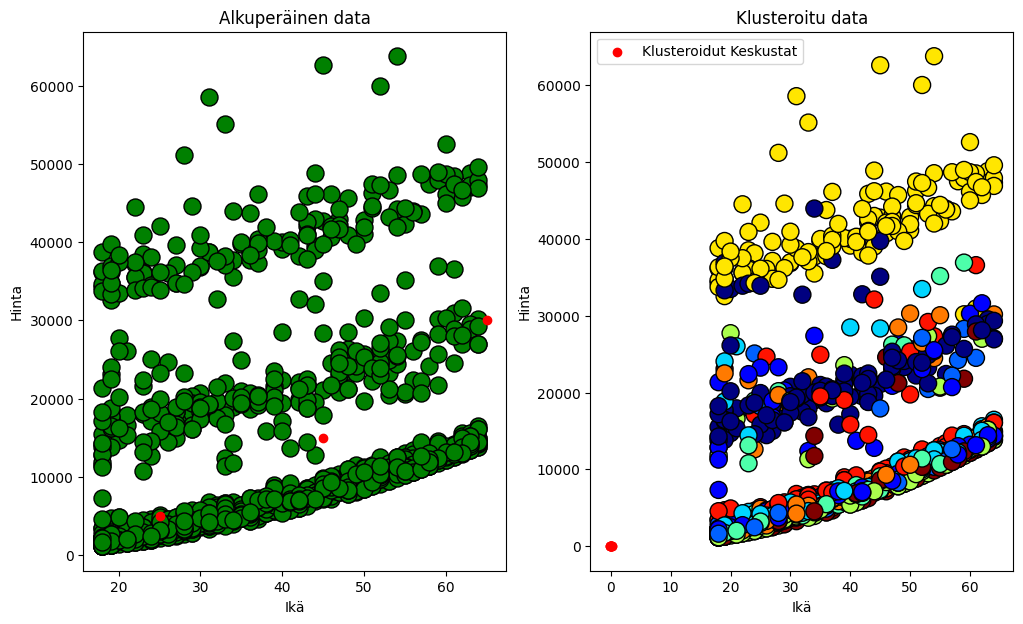

In [54]:
X_plot = df_with_clusters[["age", "charges"]].values

init_centers = np.array([
    [25, 5000],   
    [45, 15000],  
    [65, 30000]   
])

def plot_my_cluster(kmeans_object, init_centers, X_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 7))
    
    # alkuperänen data
    axes[0].scatter(X_data[:, 0], X_data[:, 1], c='g', edgecolor='k', s=150)
    axes[0].set_xlabel('Ikä')
    axes[0].set_ylabel('Hinta')
    axes[0].set_title('Alkuperäinen data')
    axes[0].scatter(init_centers[:,0], init_centers[:,1], c='r', label='Initial Centers')
    
    # klusteroitu data
    axes[1].scatter(X_data[:, 0], X_data[:, 1], c=kmeans_object.labels_, cmap='jet', edgecolor='k', s=150)
    axes[1].set_xlabel('Ikä')
    axes[1].set_ylabel('Hinta')
    axes[1].set_title('Klusteroitu data')
    axes[1].scatter(kmeans_object.cluster_centers_[:,0], kmeans_object.cluster_centers_[:,1], c='r', label='Klusteroidut Keskustat')
    
    plt.legend()
    plt.show()


plot_my_cluster(kmeans, init_centers, X_plot)

### 1.3 Käyttötarkoituksia k-means -algoritmille


**Esimerkki 1: Asiakassegmentointi markkinoinnissa**  
- K-meanssin avulla yritykset voi ryhmitellä asiakkaitaan asiakasrekisteristä ostohistorian perusteella kohdemarkkinointia varten, kuten esim. asiakkaat jotka arvostavat tarjouksia, uskolliset kanta-asiakkaat, satunnaiset asiakkaat yms. 

**Esimerkki 2: Musiikintoisto palveluiden suositukset**  
- K-means -algorytmiä voidaan hyödyntää musiikintoistopalveluissa suositellakseen asiakkaille samanlaisia kappaleita tykätyjen kappaleiden tempon, genren ja sanoituksien perusteella


## Part 2 – Experimenting with the k-means algorithm more in detail

## Part 2

### 2.1 K-means algorytmin testaukset

Tässä osassa tutkin, miten klusterointi muuttuu, kun **k:n arvoa vaihdellaan**. Kokeilen arvoja `k = 2, 3, 4, 5, 6`. Jokaiselle k-arvolle ajan k-means -algoritmin samalle skaalatulle datalle ja tarkastelen:
- **inertia-arvoa** (pisteiden etäisyys omasta klusterikeskuksestaan)
- **klusterikokoja**
- **vakuutusmaksujen keskiarvoja** kunkin klusterin sisällä

Tavoitteena on ymmärtää, miten ryhmittely tarkentuu tai pirstaloituu, kun klustereiden määrää lisätään.

In [45]:
# 2.1 Experiments with several k values
from collections import Counter
from sklearn.cluster import KMeans

results = []

for k in range(2, 7):  # k = 2..6
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Store inertia and cluster sizes
    inertia = kmeans.inertia_
    sizes = Counter(labels)
    
    # Create a small summary table of average charges per cluster
    temp = df.copy()
    temp["cluster"] = labels
    mean_charges = temp.groupby("cluster")["charges"].mean().values
    
    results.append((k, inertia, sizes, mean_charges))

# Print results in a readable form
for k, inertia, sizes, mean_charges in results:
    print(f"\n=== k = {k} ===")
    print("Inertia:", round(inertia, 2))
    print("Cluster sizes:", dict(sizes))
    print("Mean charges in clusters:", [round(x, 2) for x in mean_charges])


=== k = 2 ===
Inertia: 9831.68
Cluster sizes: {np.int32(0): 273, np.int32(1): 1062}
Mean charges in clusters: [np.float64(32060.89), np.float64(8421.2)]

=== k = 3 ===
Inertia: 8479.47
Cluster sizes: {np.int32(0): 273, np.int32(2): 273, np.int32(1): 789}
Mean charges in clusters: [np.float64(32060.89), np.float64(8555.79), np.float64(8032.22)]

=== k = 4 ===
Inertia: 7265.23
Cluster sizes: {np.int32(0): 271, np.int32(2): 273, np.int32(3): 268, np.int32(1): 523}
Mean charges in clusters: [np.float64(32182.62), np.float64(8594.39), np.float64(8032.22), np.float64(8532.78)]

=== k = 5 ===
Inertia: 6864.02
Cluster sizes: {np.int32(4): 182, np.int32(2): 273, np.int32(3): 266, np.int32(1): 523, np.int32(0): 91}
Mean charges in clusters: [np.float64(34845.0), np.float64(8594.39), np.float64(8032.22), np.float64(8479.9), np.float64(30668.83)]

=== k = 6 ===
Inertia: 6145.85
Cluster sizes: {np.int32(4): 182, np.int32(2): 273, np.int32(3): 266, np.int32(1): 257, np.int32(0): 91, np.int32(5): 26

#### Tulosten tulkinta eri k-arvoilla
Tuloksista voidaan tehdä esimerkiksi seuraavia havaintoja (tarkat luvut riippuvat satunnaissiementästä):
- Kun **k = 2**, data jakautuu hyvin karkeasti matalamman ja korkeamman kustannusriskin ryhmiin.
- Arvot **k = 3** ja **k = 4** tuottavat selkeämpiä ja tulkittavampia ryhmiä, joissa erottuu esimerkiksi tupakoijien korkean riskin ryhmä omakseen.
- Kun **k ≥ 5**, osa klustereista pienenee hyvin pieniksi, jolloin ryhmittelystä tulee helposti liian pirstaleista eikä tulkinta enää parane merkittävästi.

Kokonaisuutena vaikuttaa siltä, että tälle aineistolle **k = 3 tai k = 4** on järkevä klusterimäärä.

### 2.2 Utilization for Elbow method

Seuraavaksi käytän **Elbow-menetelmää** sopivan klusterimäärän arvioimiseen. Lasken k-means -mallin inertia-arvon arvoille `k = 1 ... 10` ja piirrän tuloksista käyrän. Elbow-menetelmässä etsitään kohtaa, jossa inertian pieneneminen hidastuu selvästi – tätä kohtaa kutsutaan "kyynärpääksi".

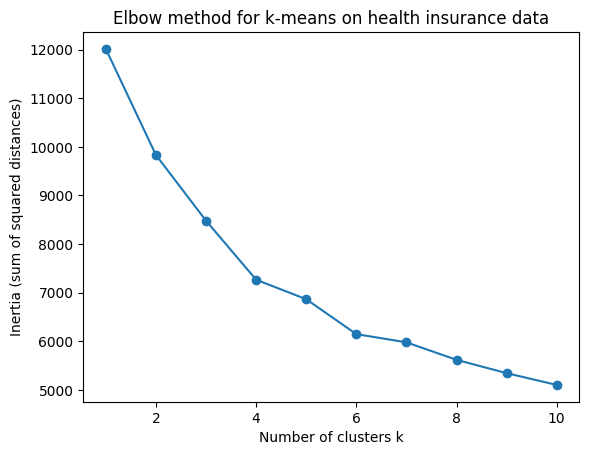

In [46]:
# 2.2 Elbow method
import matplotlib.pyplot as plt

k_values = list(range(1, 11))
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow method for k-means on health insurance data")
plt.show()

#### Elbow-käyrän tulkinta
Elbow-käyrästä nähdään, että inertia pienenee nopeasti, kun k kasvaa yhdestä noin kolmeen tai neljään, mutta tämän jälkeen käyrä loivenee. Tämä tarkoittaa, että uusien klustereiden lisääminen parantaa mallia vain vähän.

Käyrässä näkyvä "kyynärpää" asettuu yleensä noin kohdalle **k = 3–4**, mikä tukee aiemmassa kohdassa tehtyä havaintoa järkevästä klusterimäärästä.

### 2.3 Testing various options for the k-means algorithm

Lopuksi testaan joitakin k-means -algoritmin **erilaisia asetuksia (options)** käyttäen esimerkkinä klusterimäärää **k = 4**. Tarkasteltavia asetuksia ovat mm.:
- `init` – alustusmenetelmä (`"k-means++"` vs. `"random"`).
- `n_init` – montako kertaa algoritmi ajetaan eri aloituspisteillä.
- `max_iter` – sallittu maksimimäärä iteraatioita per ajo.

Vertailen seuraavia kokoonpanoja:
1. Oletusasetukset (k-means++-alustus).
2. Satunnainen alustus (`init="random"`).
3. Suurempi `n_init` (20 ajoa eri aloituspisteillä).
4. Pienempi `max_iter` (50 iteraatiota).

Jokaisesta kokoonpanosta talletan inertia-arvon ja toteutuneiden iteraatioiden määrän.

In [47]:
# 2.3 Testing various k-means options

# 1) Oletusasetukset
km_default = KMeans(n_clusters=4, random_state=42)
km_default.fit(X_scaled)
print("Default (k-means++): inertia =", round(km_default.inertia_, 2),
        ", iterations =", km_default.n_iter_)

# 2) Satunnainen alustus
km_random = KMeans(n_clusters=4, init="random", random_state=42)
km_random.fit(X_scaled)
print("Random init: inertia =", round(km_random.inertia_, 2),
        ", iterations =", km_random.n_iter_)

# 3) Suurempi n_init
km_ninit = KMeans(n_clusters=4, n_init=20, random_state=42)
km_ninit.fit(X_scaled)
print("Higher n_init: inertia =", round(km_ninit.inertia_, 2),
        ", iterations =", km_ninit.n_iter_)

# 4) Pienempi max_iter
km_maxiter = KMeans(n_clusters=4, max_iter=50, random_state=42)
km_maxiter.fit(X_scaled)
print("Fewer max_iter: inertia =", round(km_maxiter.inertia_, 2),
        ", iterations =", km_maxiter.n_iter_)


Default (k-means++): inertia = 7265.23 , iterations = 9
Random init: inertia = 7261.93 , iterations = 9
Higher n_init: inertia = 7261.93 , iterations = 7
Fewer max_iter: inertia = 7265.23 , iterations = 9


#### Asetuskokeilujen tulkinta
Tulostaulukosta voidaan tehdä seuraavia johtopäätöksiä:
- **Oletusasetukset (k-means++)** antavat jo valmiiksi hyvän ratkaisun, jossa inertia on pieni ja iteraatioiden määrä kohtuullinen.
- **Satunnainen alustus** voi johtaa hieman huonompaan inertiaan ja joskus suurempaan iteraatiomäärään, koska lähtöpisteet eivät ole yhtä hyviä.
- **Suuremman `n_init`-arvon** käyttö parantaa ratkaisun luotettavuutta, koska paras tulos valitaan useista eri ajokerroista. Tämä voi hieman pienentää inertiaa, mutta lisää laskenta-aikaa.
- **Pienempi `max_iter`** voi joissain tapauksissa estää algoritmia konvergoitumasta täysin, mikä näkyy hieman suurempana inertia-arvona. Tässä aineistossa vaikutus ei kuitenkaan ole kovin suuri.

Kokonaisuutena kokeet osoittavat, että k-means++-alustus oletusasetuksilla on hyvä lähtökohta, mutta `n_init`-arvon kasvattaminen voi parantaa tulosta erityisesti monimutkaisemmilla aineistoilla.